# Customer Churn Prediction- Classification

<font color='red'><h2>Introduction</h2></font>

Customer churn (also known as customer attrition) occurs when a customer stops using a company's products or services.

Customer churn affects profitability, especially in industries where revenues are heavily dependent on subscriptions (e.g. banks, telephone and internet service providers, pay-TV companies, insurance firms, etc.). It is estimated that acquiring a new customer can cost up to five times more than retaining an existing one.

Therefore, customer churn analysis is essential as it can help a business:

identify problems in its services (e.g. poor quality product/service, poor customer support, wrong target audience, etc.), and
make correct strategic decisions that would lead to higher customer satisfaction and consequently higher customer retention.

<font color='red'><h2>Objective</h2></font>

The goal of this notebook is to understand and predict customer churn for a bank. Specifically, we will initially perform Exploratory Data Analysis (EDA) to identify and visualise the factors contributing to customer churn. This analysis will later help us build Machine Learning models to predict whether a customer will churn or not.

This problem is a typical classification task. The task does not specify which performance metric to use for optimising our machine learning models. I decided to use recall since correctly classifying elements of the positive class (customers who will churn) is more critical for the bank.

Skills: Exploratory Data Analysis, Data Visualisation, Data Preprocessing (Feature Selection, Encoding Categorical Features, Feature Scaling), Addressing Class Imbalance (SMOTE), Model Tuning.

Models Used: Logistic Regression, Support Vector Machines, Random Forests, Gradient Boosting, XGBoost, and Light Gradient Boosting Machine.

In [1]:
# required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# preprocessing
from sklearn.preprocessing import LabelEncoder,StandardScaler

# train test splitting
from sklearn.model_selection import train_test_split

# dataset balancing
from imblearn.over_sampling import SMOTE

# machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# hyperparameter tunning technique
from sklearn.model_selection import RandomizedSearchCV

# classification metrics
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

#exporting the model
import pickle

sns.set()
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Churn_Modelling.csv')
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [3]:
data.shape

(10000, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [5]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
# checking null values
data.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
# checking duplicates values
data.duplicated().sum()

0

## Exploratory Data Analysis

Continuous:  Age, CreditScore, Balance, EstimatedSalary
Categorical:  Geography, Gender, Tenure, NumOfProducts, HasCrCard, IsActiveMember


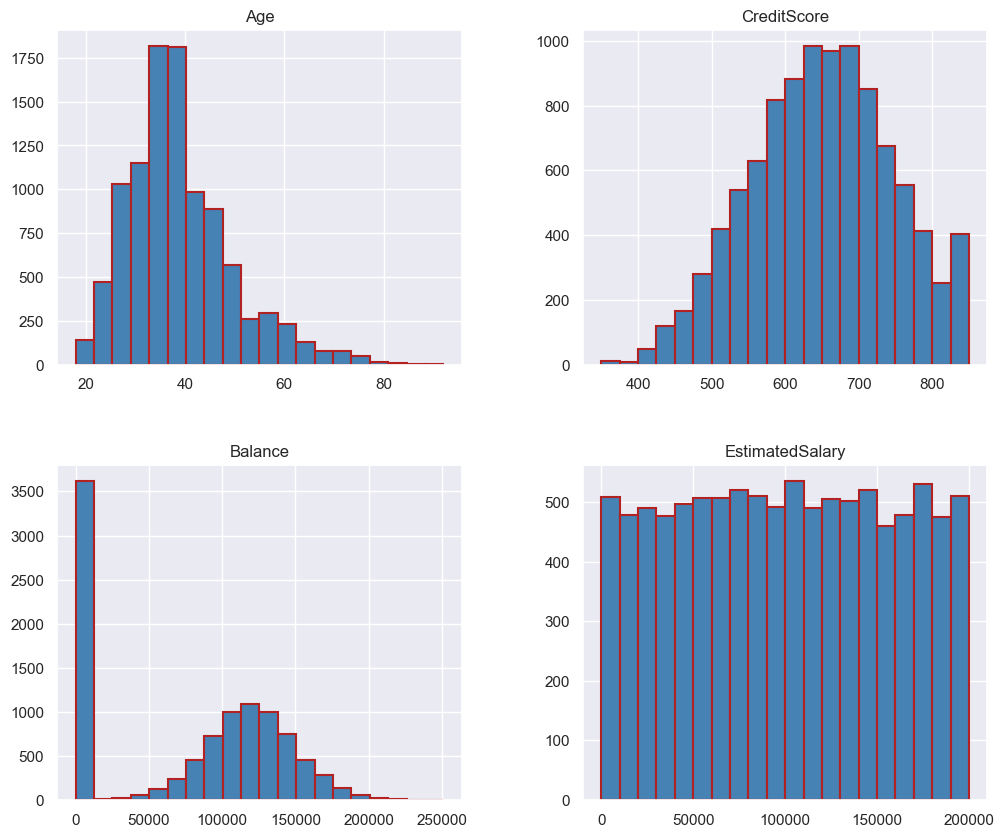

In [8]:
# EDA on Credit Score
# sns.histplot(data['CreditScore'])
continuous = ['Age', 'CreditScore', 'Balance', 'EstimatedSalary']
categorical = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

print('Continuous: ', ', '.join(continuous))
print('Categorical: ', ', '.join(categorical))
data[continuous].hist(figsize=(12, 10),
                          bins=20,
                          layout=(2, 2),
                          color='steelblue',
                          edgecolor='firebrick',
                          linewidth=1.5);

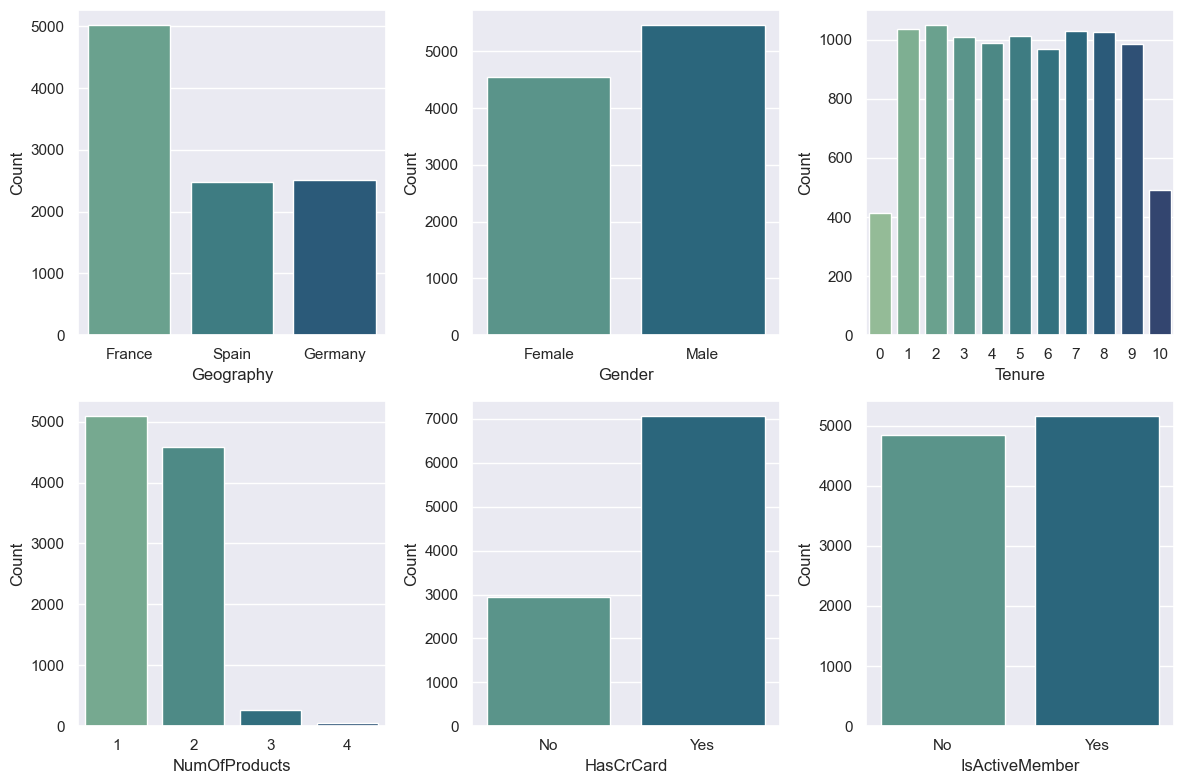

In [9]:
df_cat = data[categorical]

fig, ax = plt.subplots(2, 3, figsize=(12, 8))

for index, column in enumerate(df_cat.columns):

    plt.subplot(2, 3, index + 1)
    sns.countplot(x=column, data=data, palette='crest')

    plt.ylabel('Count')
    if (column == 'HasCrCard' or column == 'IsActiveMember'):
        plt.xticks([0, 1], ['No', 'Yes'])

plt.tight_layout();

In [10]:
# checking correlation
data.corr()['Exited']

CreditScore       -0.027094
Age                0.285323
Tenure            -0.014001
Balance            0.118533
NumOfProducts     -0.047820
HasCrCard         -0.007138
IsActiveMember    -0.156128
EstimatedSalary    0.012097
Exited             1.000000
Name: Exited, dtype: float64

<AxesSubplot: >

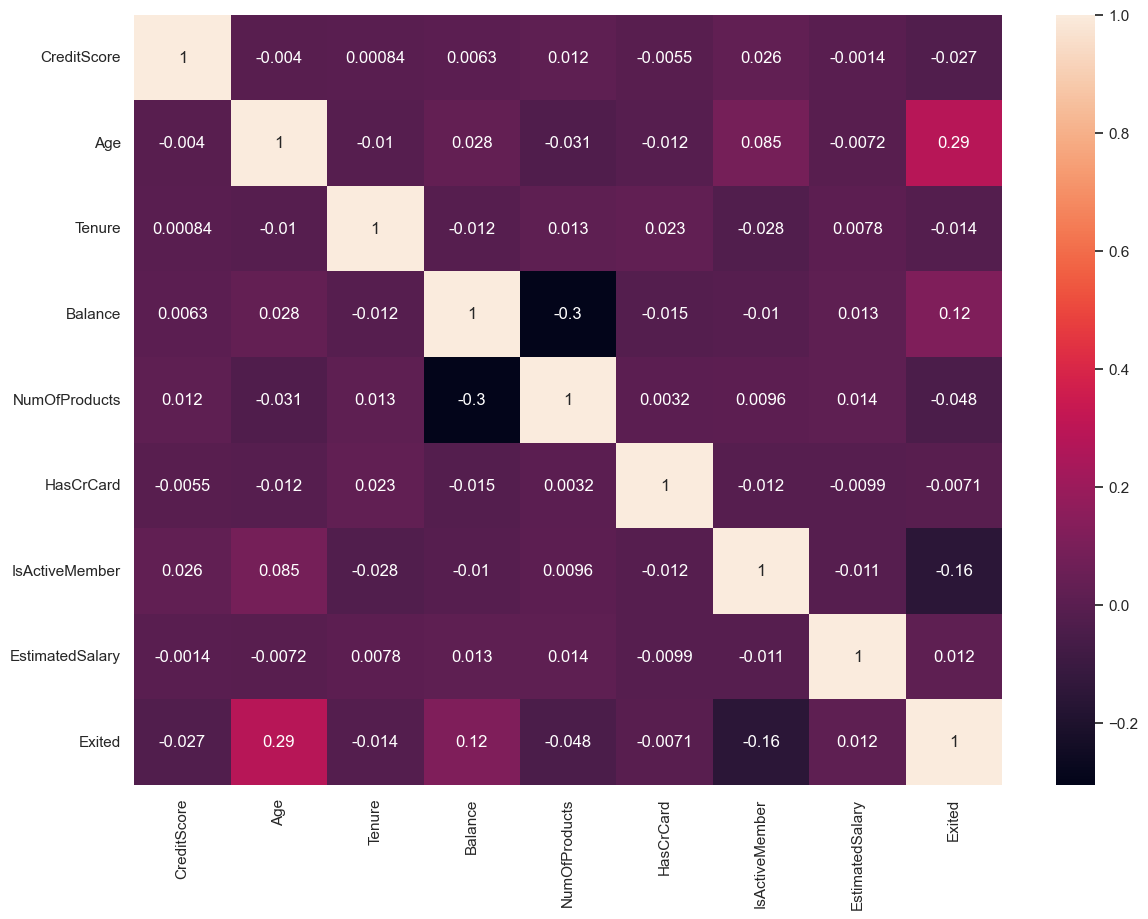

In [11]:
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(),annot=True,)

## Data Preprocessing
Data preprocessing is the process of converting raw data into a well-readable format that is suitable for building and training Machine Learning models

### Encoding Categorical Features

In [12]:
# Encoding gender columns values
data['Gender']= LabelEncoder().fit_transform(data['Gender'])

In [13]:
data['Tenure'].replace([0,1,2,3,4,5],0,regex=False,inplace=True)
data['Tenure'].replace([5,6,7,8,9,10],1,regex=False,inplace=True)

In [14]:
# The churn rate for customers in Spain and France is almost equal 
# and considerably lower than in Germany. Therefore, it makes sense to encode this
# feature so that it differentiates between German and non-German customers

data['Geography']=data['Geography'].map({
    'Germany':1,
    'Spain':0,
    'France':0
})

## Scaling
Feature scaling is a technique used to normalise the range of features in a dataset. Some algorithms are sensitive to feature scaling (e.g. SVMs), while others are invariant (e.g. Random Forests).

I decided to use StandardScaler(), which standardises features by subtracting the mean and dividing by the standard deviation. This transformation results in features with zero mean and unit variance.

In [15]:
sc=StandardScaler()
columns=['CreditScore','Age','Balance','EstimatedSalary']
data[columns]=sc.fit_transform(data[columns])

## Splitting the training set and testing test

In [16]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Addressing Class Imbalance
As we have seen previously, there is an imbalance in the classes to be predicted, with one class (0 – retained) much more prevalent than the other (1 - churned):

In [17]:
y_train.value_counts()

0    6356
1    1644
Name: Exited, dtype: int64

In [18]:
over = SMOTE(sampling_strategy='auto', random_state=42)
X_train, y_train = over.fit_resample(X_train, y_train)

y_train.value_counts()

0    6356
1    6356
Name: Exited, dtype: int64

## Building Machine Learning Models

1. Logistic Regresssion
2. SVM
3. Random Forest
4. Voting Classifier
5. Gradient Boost
6. Xgboost

## Classification Metrics Function

In [19]:
def clf_metrics(classifier,name,X,y):
    print('                 '+'\033[1m'+name+'\033[0m')
    print('------------------------------------------------------')
    y_pred=classifier.predict(X)
    y_pred = y_pred.round()
    print('Accuracy Score : {:.2f}'.format(np.round(accuracy_score(y,y_pred),2)))
    fig, (ax1) = plt.subplots(figsize=(6, 4))
    plot_conf_mx(confusion_matrix(y,y_pred,normalize='true'),ax1)
    print('Precision Score : {}'.format(np.round(precision_score(y,y_pred),2)))
    print('Recall Score : {}'.format(np.round(recall_score(y,y_pred),2)))
    print('F1 Score : {}'.format(np.round(f1_score(y,y_pred),2)))

In [20]:
def plot_conf_mx(cm, ax):
    '''Plot a confusion matrix in the specified axes object.'''
    sns.heatmap(data=cm,
                annot=True,
                cmap='Blues',
                annot_kws={'fontsize': 30},
                ax=ax)

    ax.set_xlabel('Predicted Label')
    ax.set_xticks([0.5, 1.5])
    ax.set_xticklabels(['Retained', 'Churned'])

    ax.set_ylabel('True Label')
    ax.set_yticks([0.25, 1.25])
    ax.set_yticklabels(['Retained', 'Churned']);

### 1. Logistic Regresssion with Hyperparameter tunning [RandomizedSearchCV]

                 Logistic Regression
------------------------------------------------------
Accuracy Score : 0.72
Precision Score : 0.73
Recall Score : 0.71
F1 Score : 0.72


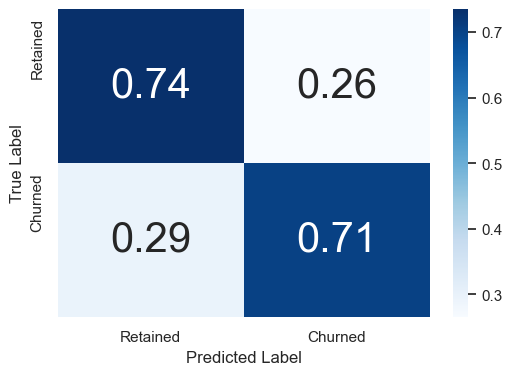

In [21]:
clf1=LogisticRegression()

param_grid={
    'penalty': ['l1','l2'],
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear','sag','saga'] 
}
ht_clf1=RandomizedSearchCV(estimator=clf1,param_distributions=param_grid,cv=5,verbose=False,n_jobs=-1,n_iter=9,scoring='neg_mean_squared_error',random_state=42)

classifier_1=ht_clf1.fit(X_train,y_train)

clf_metrics(classifier_1,'Logistic Regression',X_train,y_train)

### 2. Support Vector Classifier with Hyperparameter tunning [RandomizedSearchCV]

                 Support Vector Classifier
------------------------------------------------------
Accuracy Score : 0.82
Precision Score : 0.83
Recall Score : 0.82
F1 Score : 0.82


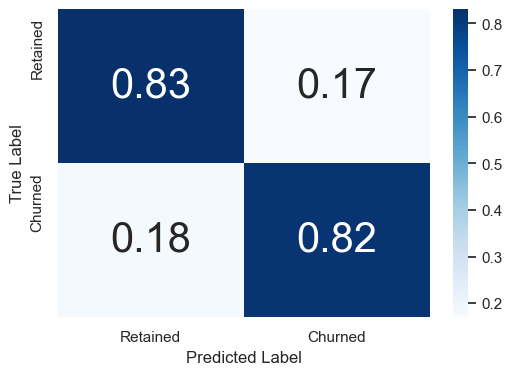

In [22]:
clf2=SVC()

param_grid={
    'kernel': ['linear', 'rbf'],
    'gamma' : ['scale', 'auto'],
    'C' : [.1, 1, 2]
    }

ht_clf2=RandomizedSearchCV(estimator=clf2,param_distributions=param_grid,cv=5,verbose=False,n_jobs=-1,n_iter=9,scoring='neg_mean_squared_error',random_state=42)

classifier_2=ht_clf2.fit(X_train,y_train)

clf_metrics(classifier_2,'Support Vector Classifier',X_train,y_train)

### 3. Random Forest Classifier with Hyperparameter tunning [RandomizedSearchCV]

                 Random Forest Classifier
------------------------------------------------------
Accuracy Score : 0.90
Precision Score : 0.9
Recall Score : 0.89
F1 Score : 0.89


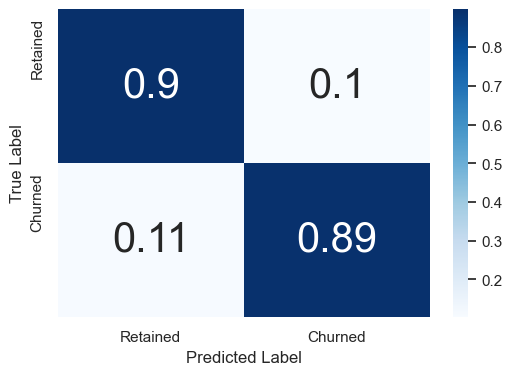

In [23]:
clf3=RandomForestClassifier()

param_grid={
    'n_estimators' : [50,80],

    'max_depth' : [5,10],

    'max_features' : ['auto','sqrt'],

    'min_samples_split' : [2,4,5],

    'min_samples_leaf' : [1,2]

}
ht_clf3= RandomizedSearchCV(estimator=clf3,param_distributions=param_grid,cv=5,verbose=False,n_jobs=-1,n_iter=9,scoring='neg_mean_squared_error',random_state=42)

classifier_3= ht_clf3.fit(X_train,y_train)

clf_metrics(classifier_3,'Random Forest Classifier',X_train,y_train)

### 4. Voting Classifier with Hyperparameter tunning [RandomizedSearchCV]

                 Voting Classifier
------------------------------------------------------
Accuracy Score : 0.87
Precision Score : 0.88
Recall Score : 0.87
F1 Score : 0.87


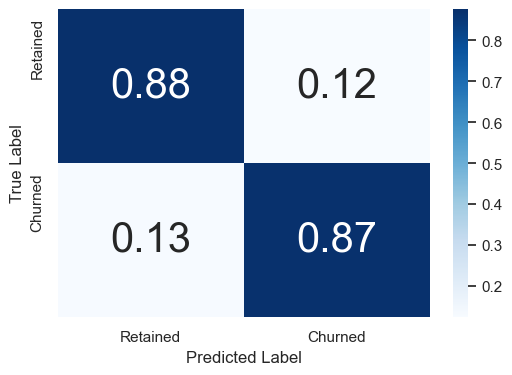

In [24]:
estimators=[('lr',clf1),('svc',clf2),('rf',clf3)]
clf4=VotingClassifier(estimators=estimators)

param_grid={
    'voting': ['hard','soft']
}

ht_clf4=RandomizedSearchCV(estimator=clf4,param_distributions=param_grid,cv=5,verbose=False,n_jobs=-1,n_iter=9,scoring='neg_mean_squared_error',random_state=42)

classifier_4=ht_clf4.fit(X_train,y_train)

clf_metrics(classifier_4,'Voting Classifier',X_train,y_train)

### 5. Gradient Boosting Classifier with Hyperparameter tunning [RandomizedSearchCV]

                 Gradient Boosting Classifier
------------------------------------------------------
Accuracy Score : 0.79
Precision Score : 0.82
Recall Score : 0.76
F1 Score : 0.79


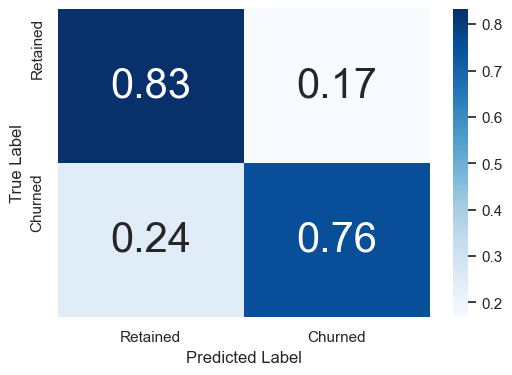

In [25]:
clf5=GradientBoostingClassifier()

param_grid={
    'n_estimators': [100,200],
    'subsample': [0.66, 0.75],
    'learning_rate': [0.001, 0.01],
    'max_depth': [3,4],  # default=3
    'min_samples_split': [5, 7],
    'min_samples_leaf': [3, 5],
    'max_features': ['auto', 'log2', None],
    'n_iter_no_change': [20],
    'validation_fraction': [0.2],
    'tol': [0.01]
}

ht_clf5=RandomizedSearchCV(estimator=clf5,param_distributions=param_grid,cv=5,verbose=False,n_jobs=-1,n_iter=9,scoring='neg_mean_squared_error',random_state=42)

classifier_5=ht_clf5.fit(X_train,y_train)

clf_metrics(classifier_5,'Gradient Boosting Classifier',X_train,y_train)

### 6. XgBoost Classifier without Hyperparameter tunning

                 XgBoost Classifier
------------------------------------------------------
Accuracy Score : 0.95
Precision Score : 0.97
Recall Score : 0.94
F1 Score : 0.95


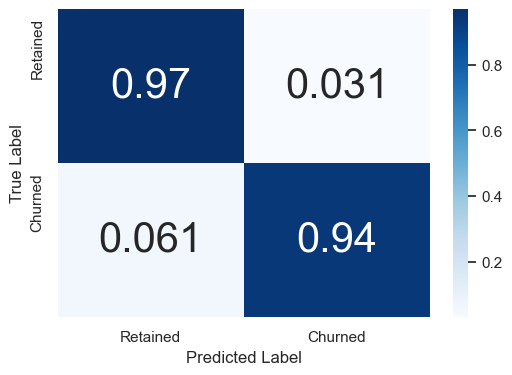

In [26]:
clf6=XGBClassifier()

classifier_6=clf6.fit(X_train,y_train)

clf_metrics(classifier_6,'XgBoost Classifier',X_train,y_train)

## Evaluating the Test Set

                 Logistic Regression
------------------------------------------------------
Accuracy Score : 0.73
Precision Score : 0.39
Recall Score : 0.68
F1 Score : 0.5


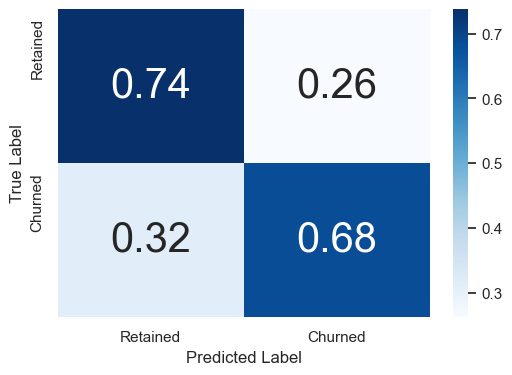

In [27]:
# Logistic Regression
clf_metrics(classifier_1,'Logistic Regression',X_test,y_test)


                 SVC
------------------------------------------------------
Accuracy Score : 0.80
Precision Score : 0.49
Recall Score : 0.74
F1 Score : 0.59


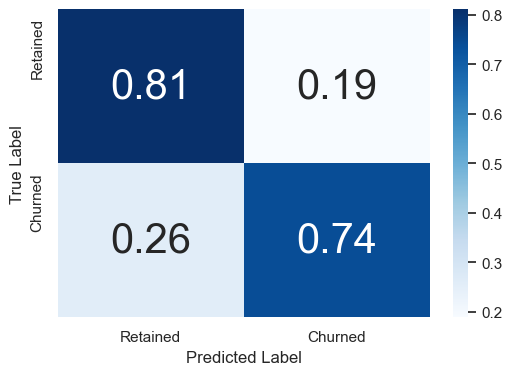

In [28]:
# Support Vector Classifier
clf_metrics(classifier_2,'SVC',X_test,y_test)

                 Random Forest Classifier
------------------------------------------------------
Accuracy Score : 0.82
Precision Score : 0.53
Recall Score : 0.71
F1 Score : 0.61


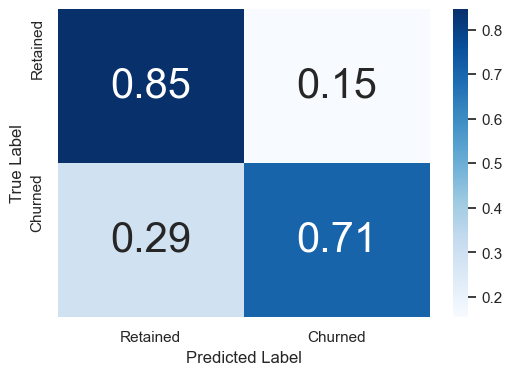

In [29]:
# Random Forest Classifier
clf_metrics(classifier_3,'Random Forest Classifier',X_test,y_test)

                 Voting Classifier
------------------------------------------------------
Accuracy Score : 0.81
Precision Score : 0.51
Recall Score : 0.72
F1 Score : 0.6


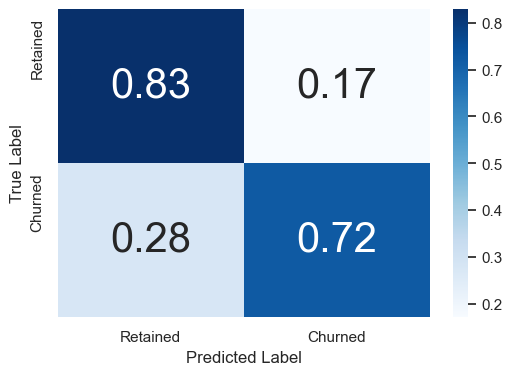

In [30]:
# Voting Classifier
clf_metrics(classifier_4,'Voting Classifier',X_test,y_test)

                 Gradient Boosting Classifier
------------------------------------------------------
Accuracy Score : 0.81
Precision Score : 0.51
Recall Score : 0.75
F1 Score : 0.6


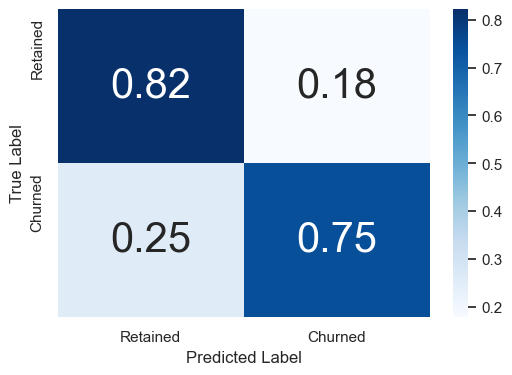

In [31]:
# Gradient Boosting Classifier
clf_metrics(classifier_5,'Gradient Boosting Classifier',X_test,y_test)

                 XGB Classifier
------------------------------------------------------
Accuracy Score : 0.85
Precision Score : 0.63
Recall Score : 0.59
F1 Score : 0.61


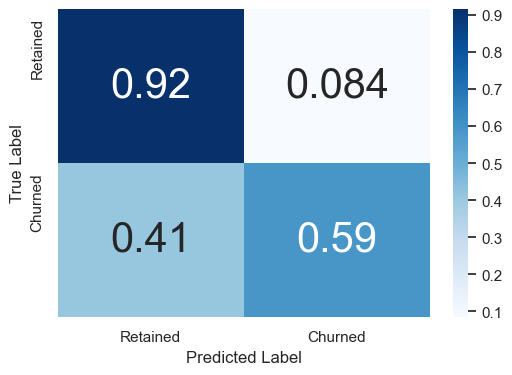

In [32]:
# XGB Classifier
clf_metrics(classifier_6,'XGB Classifier',X_test,y_test)

## Exporting the Model

In [33]:
# exporting the train data
df=pd.read_csv('Churn_Modelling.csv')
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
pickle.dump(df,open('df.pkl','wb'))

# exporting the xgboost model because of the high accuracy
pickle.dump(classifier_6,open('model.pkl','wb'))

In [34]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,0,0,0.293517,0,-1.225848,1,1,1,0.021886,1
1,-0.440036,0,0,0.198164,0,0.117350,1,0,1,0.216534,0
2,-1.536794,0,0,0.293517,1,1.333053,3,1,0,0.240687,1
3,0.501521,0,0,0.007457,0,-1.225848,2,0,0,-0.108918,0
4,2.063884,0,0,0.388871,0,0.785728,1,1,1,-0.365276,0
